In [136]:
# Import the libraries we need for this qpp

import torch.nn as nn
import torch
import matplotlib.pyplot as plt 
# Set the random seed

torch.manual_seed(42)

In [29]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)
print("The tensor: ", z)

The tensor:  tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])


In [30]:
# Create sigmoid object

sig = nn.Sigmoid()

In [31]:
# Use sigmoid object to calculate the 

yhat = sig(z)
yhat

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])

Text(0, 0.5, 'yhat')

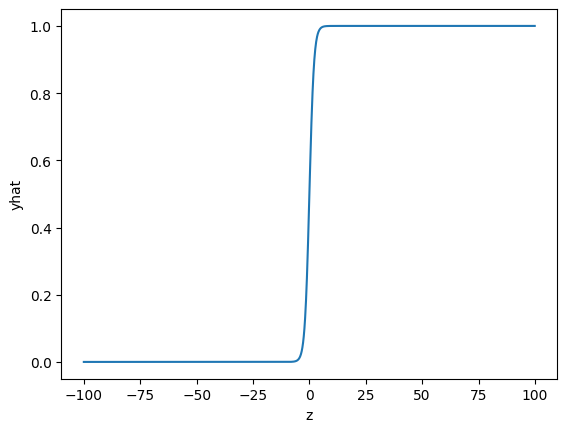

In [32]:
plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

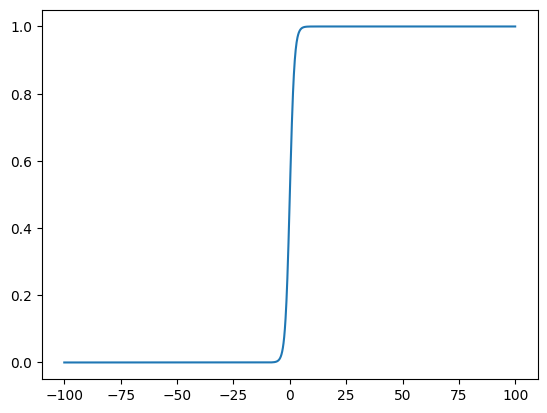

In [33]:
yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

In [34]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[1.0], [100]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[  1.],
        [100.]])


In [35]:
# Use sequential function to create model

model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

In [36]:
print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])


In [37]:
# The prediction for x

yhat = model(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.8313]], grad_fn=<SigmoidBackward0>)


In [38]:
# The prediction for X

yhat = model(X)
yhat

tensor([[0.8313],
        [1.0000]], grad_fn=<SigmoidBackward0>)

In [62]:
# Create and print samples

x = torch.tensor([[1.0, 1.0]])
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1., 1.]])
X =  tensor([[1., 1.],
        [1., 2.],
        [1., 3.]])


In [63]:
# Create new model using nn.sequential()

model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

In [64]:
# Print the parameters

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[ 0.1427, -0.3443]], requires_grad=True), Parameter containing:
tensor([0.4153], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[ 0.1427, -0.3443]])), ('0.bias', tensor([0.4153]))])


In [65]:
# Make the prediction of x

yhat = model(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.5532]], grad_fn=<SigmoidBackward0>)


In [82]:
import math

def sigmoid(a):
  return 1 / (1 + math.exp(-a))

model_param=list(model.parameters())

print("Weight1*x1:",model_param[0].detach().numpy()[0][0]*x.numpy()[0][0])
print("Weight2*x2:",model_param[0].detach().numpy()[0][1]*x.numpy()[0][1])
print("Bias:",model_param[1].detach().numpy()[0])
l=(model_param[0].detach().numpy()[0][0]*x.numpy()[0][0])+(model_param[0].detach().numpy()[0][1]*x.numpy()[0][1])+model_param[1].detach().numpy()[0]
k = sigmoid(l)
print("sigmoid((w1*x1)+(w2*x2)+bias):",k)

Weight1*x1: 0.14268756
Weight2*x2: -0.3442585
Bias: 0.41527158
sigmoid((w1*x1)+(w2*x2)+bias): 0.5532227690497633


In [83]:
# The prediction of X

yhat = model(X)
print("The prediction: ", yhat)

The prediction:  tensor([[0.5532],
        [0.4674],
        [0.3835]], grad_fn=<SigmoidBackward0>)


<h2 >Build Custom Modules</h2>
​

In [84]:
# Create logistic_regression custom class

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
    
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [85]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[-100.],
        [   0.],
        [ 100.]])


In [86]:
# Create logistic regression model

model = logistic_regression(1)

In [87]:
# Print parameters 

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[0.8815]], requires_grad=True), Parameter containing:
tensor([-0.7336], requires_grad=True)]

model.state_dict():
  OrderedDict([('linear.weight', tensor([[0.8815]])), ('linear.bias', tensor([-0.7336]))])


In [88]:
# Make the prediction of x

yhat = model(x)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[0.5369]], grad_fn=<SigmoidBackward0>)


In [89]:
# Make the prediction of X

yhat = model(X)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[0.0000],
        [0.3244],
        [1.0000]], grad_fn=<SigmoidBackward0>)


In [90]:
# Create logistic regression model

model = logistic_regression(2)

In [92]:
# Create x and X tensor

x = torch.tensor([[1.0, 2.0]])
X = torch.tensor([[100, -100], [0.0, 0.0], [-100, 100]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1., 2.]])
X =  tensor([[ 100., -100.],
        [   0.,    0.],
        [-100.,  100.]])


In [93]:
# Make the prediction of x

yhat = model(x)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[0.8025]], grad_fn=<SigmoidBackward0>)


In [94]:
# Make the prediction of X

yhat = model(X)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[1.0000e+00],
        [6.2771e-01],
        [1.9144e-21]], grad_fn=<SigmoidBackward0>)


In [140]:
# Practice: Make your model and make the prediction

X = torch.tensor([-10.0])

In [141]:
my_model=nn.Sequential(nn.Linear(1, 1),nn.Sigmoid())
       

In [142]:
yhat_my=my_model(X)
print("The prediction result: \n", yhat_my)

The prediction result: 
 tensor([0.9631], grad_fn=<SigmoidBackward0>)


<h2>Cross Entropy Loss </h2>

In [143]:
# Import the libraries we need for this lab

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [144]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - (1 / (1 + np.exp(-1*w2 * self.x - b2)))) ** 2)
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [145]:
# Set random seed

torch.manual_seed(0)

In [146]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [147]:
data_set = Data()

In [148]:
class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [149]:
model = logistic_regression(1)

In [150]:
# Set the weight and bias

model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


<Figure size 640x480 with 0 Axes>

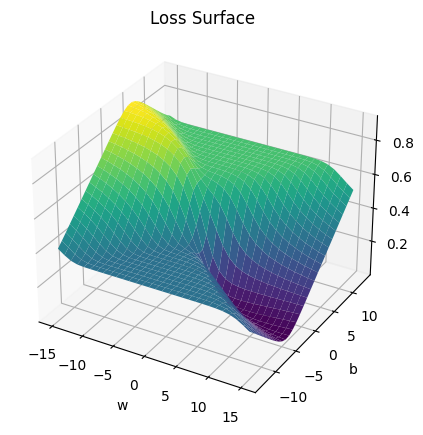

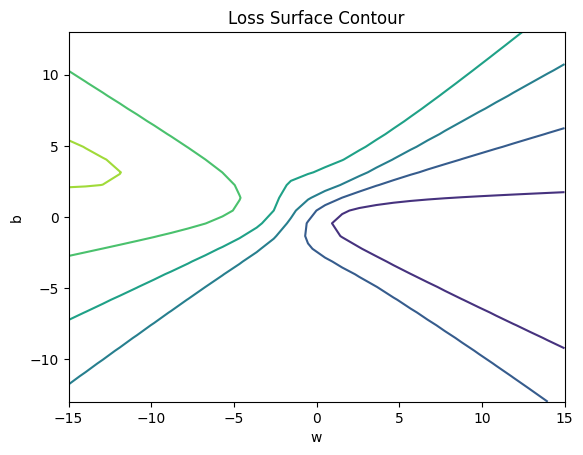

In [151]:
# Create the plot_error_surfaces object

get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

In [152]:
# Create dataloader object, crierion function and optimizer.

trainloader = DataLoader(dataset=data_set, batch_size=3)
criterion_rms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

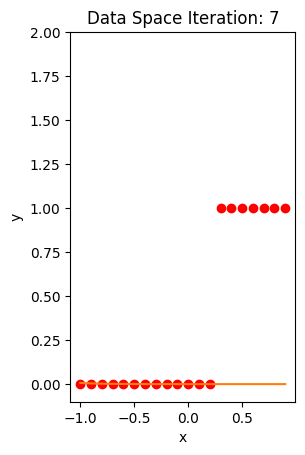

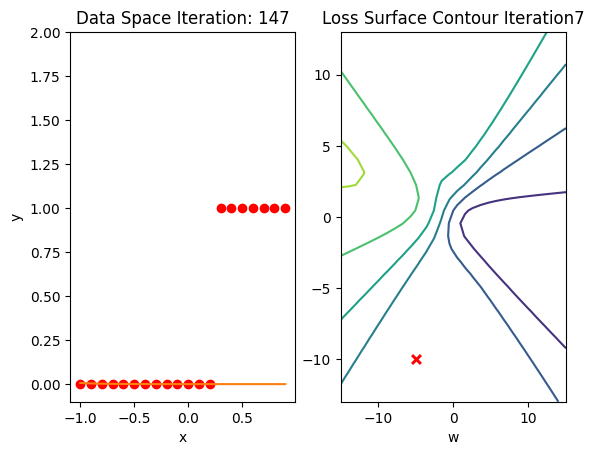

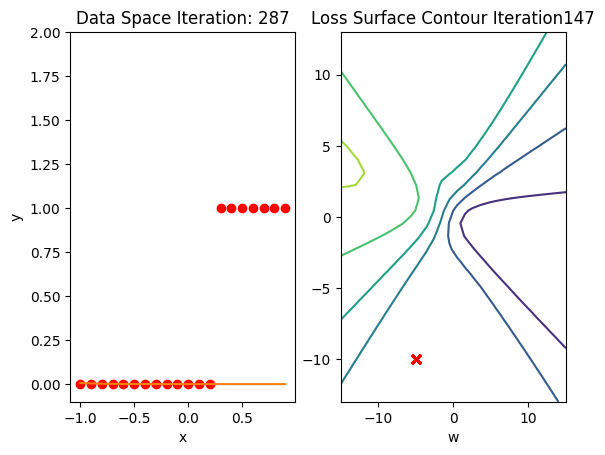

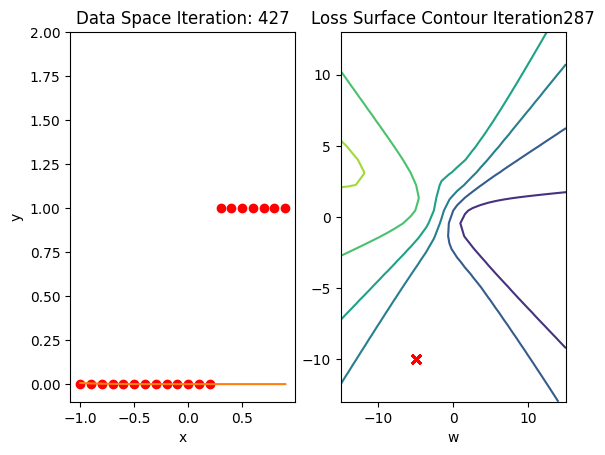

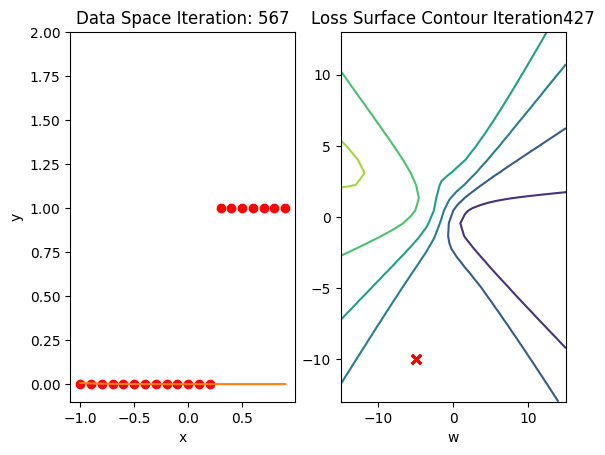

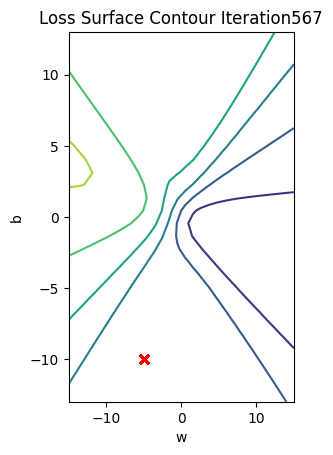

In [153]:
# Train the model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader: 
            yhat = model(x)
            loss = criterion_rms(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()

train_model(100)

In [154]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(0.6500)


In [161]:
# Create dataloader with criterion function and optimizer

def criterion(yhat,y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out

# Build in criterion
# criterion = nn.BCELoss()

trainloader = DataLoader(dataset = data_set, batch_size = 3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

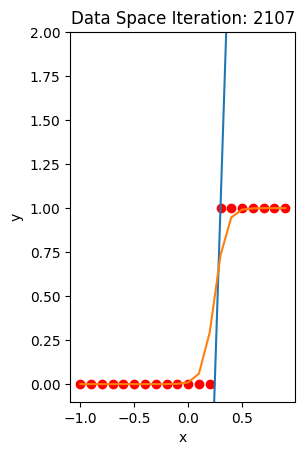

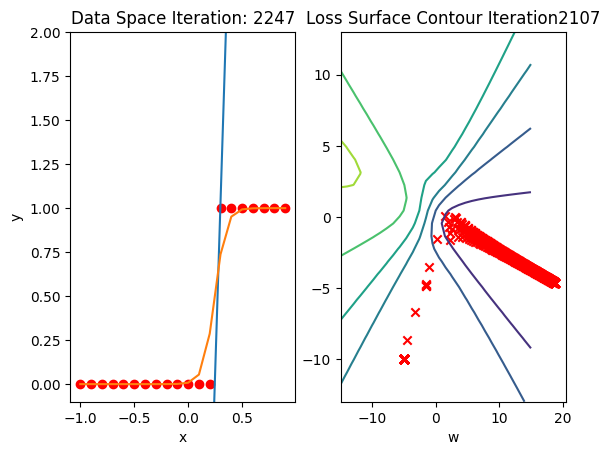

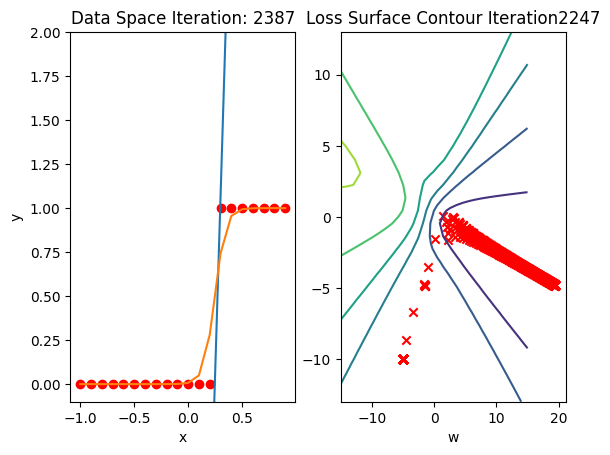

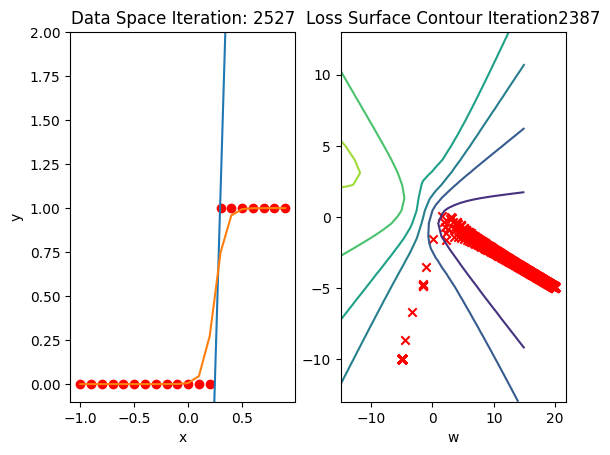

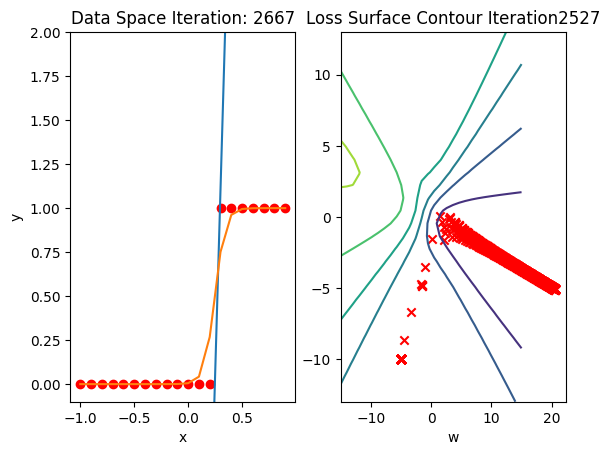

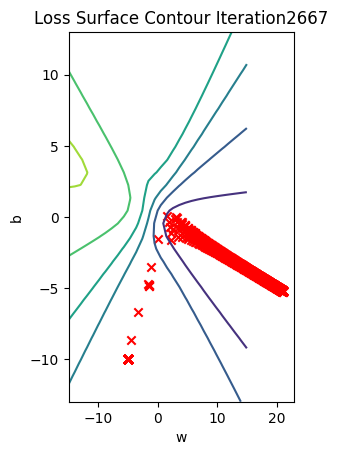

In [162]:
# Train the Model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()
            
train_model(100)

In [163]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(1.)
